## Chalcogenide perovskite stability based on $\tau*$

The Figure 2, in the paper can be obtained based on the experimental data were SISSO was trained as well as the determined thresholds.

In [1]:
from tf_chpvk_pv.config import RESULTS_DIR
import pandas as pd
import pickle

df = pd.read_csv(RESULTS_DIR / "processed_chpvk_concat_dataset.csv")

df.rename(columns={"t_jess": "t*",
                   "t_sisso": "tau*",
                   "p_t_sisso": "p_tau*"}, inplace=True)

2025-12-24 10:08:02.288 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/dagar/TF-ChPVK-PV


a. Modified tolerance factor distribution on the experimental perovskite data used for training

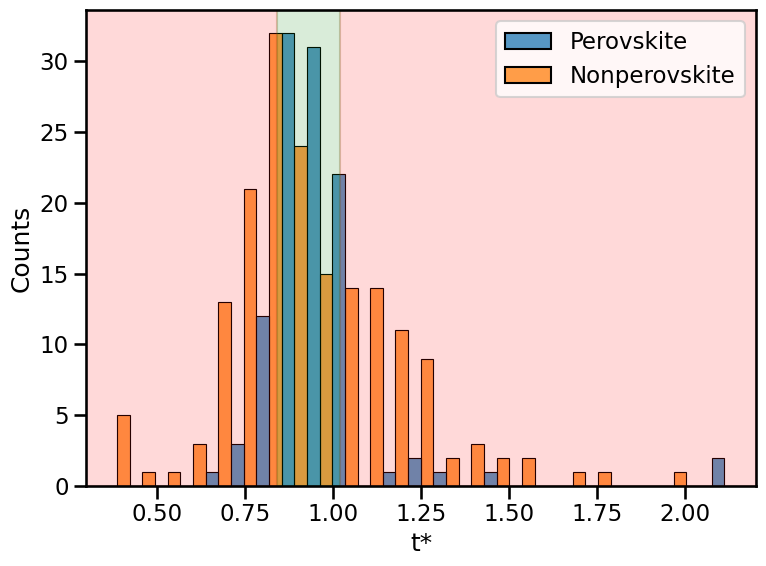

In [2]:
from tf_chpvk_pv.plots import plot_t_star_histogram

plot_t_star_histogram(thresholds=[0.84,1.02], df=df)

b. New $\tau*$ tolerance factor distribution on the experimental perovskite data

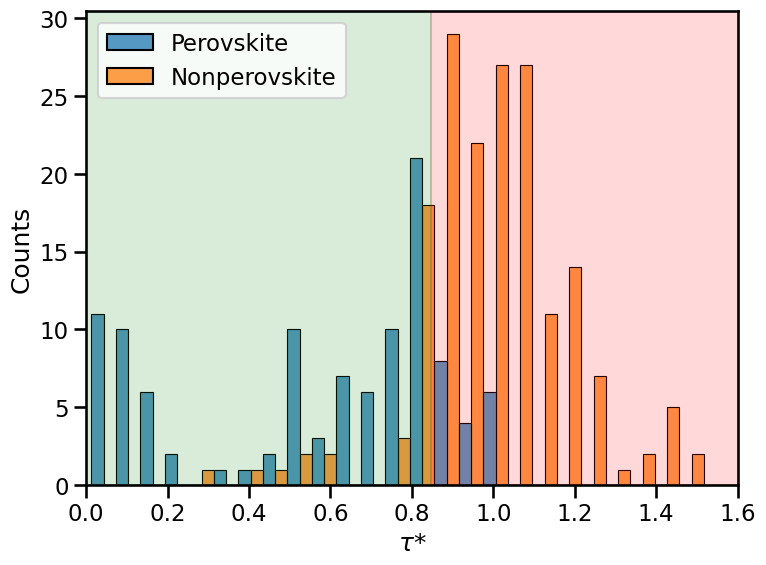

In [3]:
from tf_chpvk_pv.plots import plot_tau_star_histogram

plot_tau_star_histogram(threshold=0.846, df=df)

c. Plat scaling probability of phase stability based on the new $\tau*$ as a function of the modified tolerance factor for the experimental perovskite data

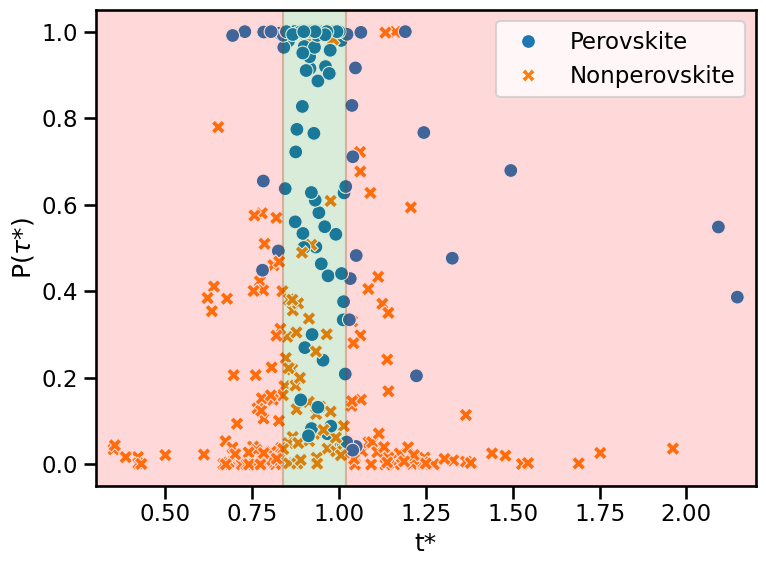

In [4]:
from tf_chpvk_pv.plots import plot_t_star_vs_p_t_sisso

plot_t_star_vs_p_t_sisso(df=df, thresholds=[0.84,1.02])

d. Elemental distribution of the predicted perovskite phases with a $\tau* < 0.496$

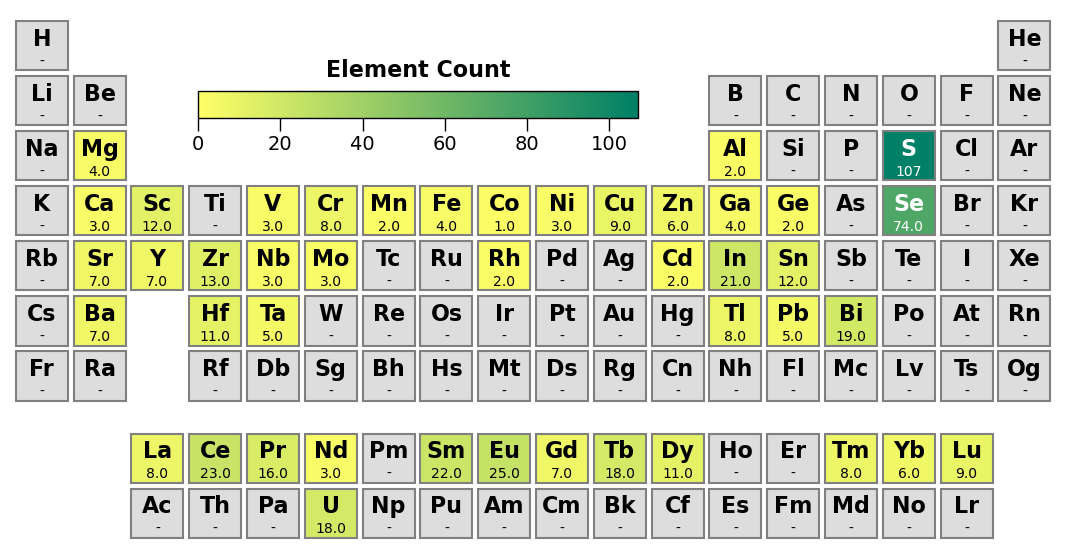

In [5]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import graph_periodic_table

df_candidates = pd.read_csv(PROCESSED_DATA_DIR / "stable_compositions.csv")

df_candidates.rename(columns={'Unnamed: 0': 'material'}, inplace=True)

graph_periodic_table(df_candidates.material.tolist())

## $\tau*$ dependence on the radii

2025-12-24 10:08:15.503 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-12-24 10:08:15.584 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.


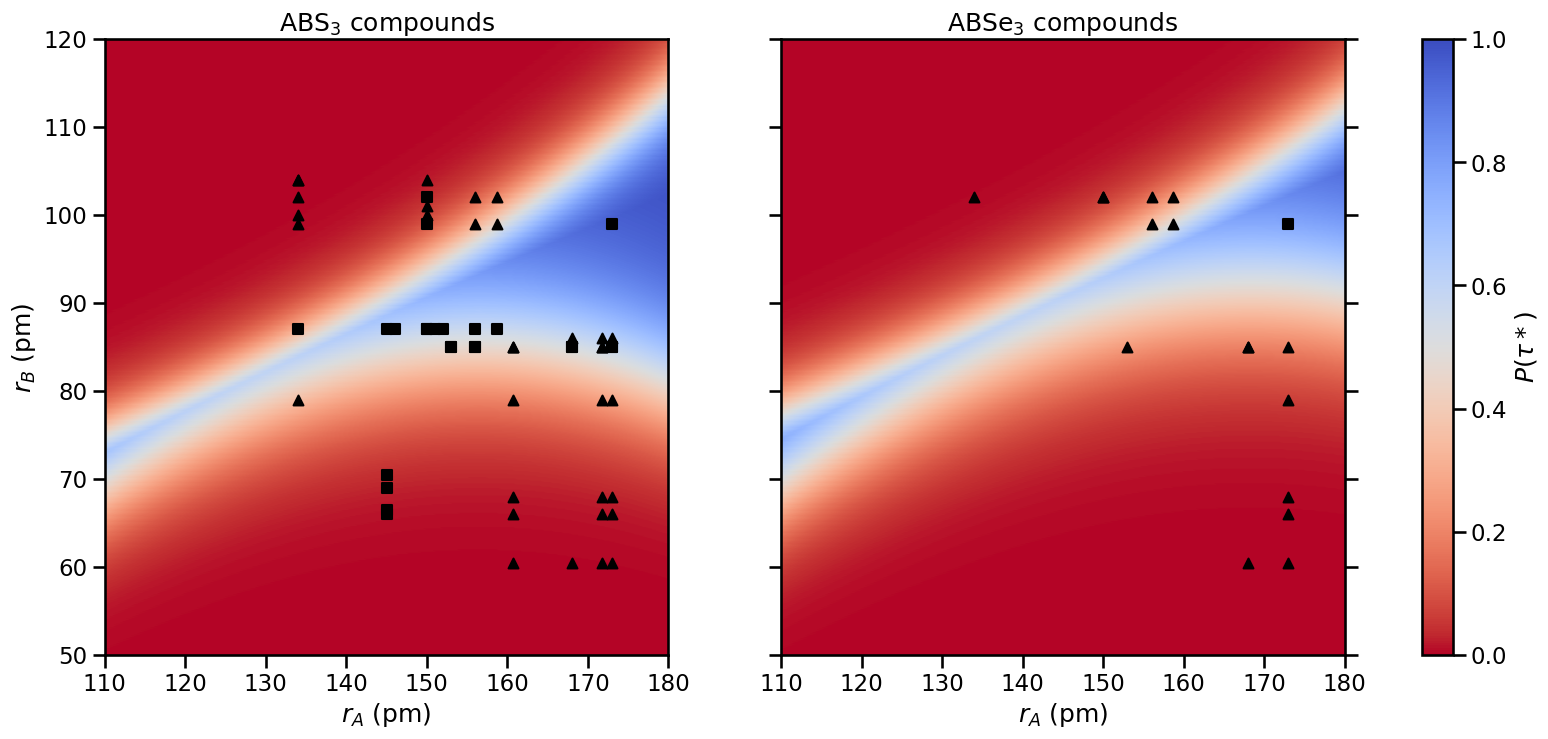

In [6]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import colormap_radii
import pandas as pd

df_exp = pd.read_csv(PROCESSED_DATA_DIR / "chpvk_dataset.csv")

df_exp.set_index('material', inplace=True)

df = pd.read_csv(PROCESSED_DATA_DIR / "valid_new_compositions.csv")

colormap_radii(df=df, exp_df=df_exp)

2025-12-24 10:09:18.822 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-12-24 10:09:18.851 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.


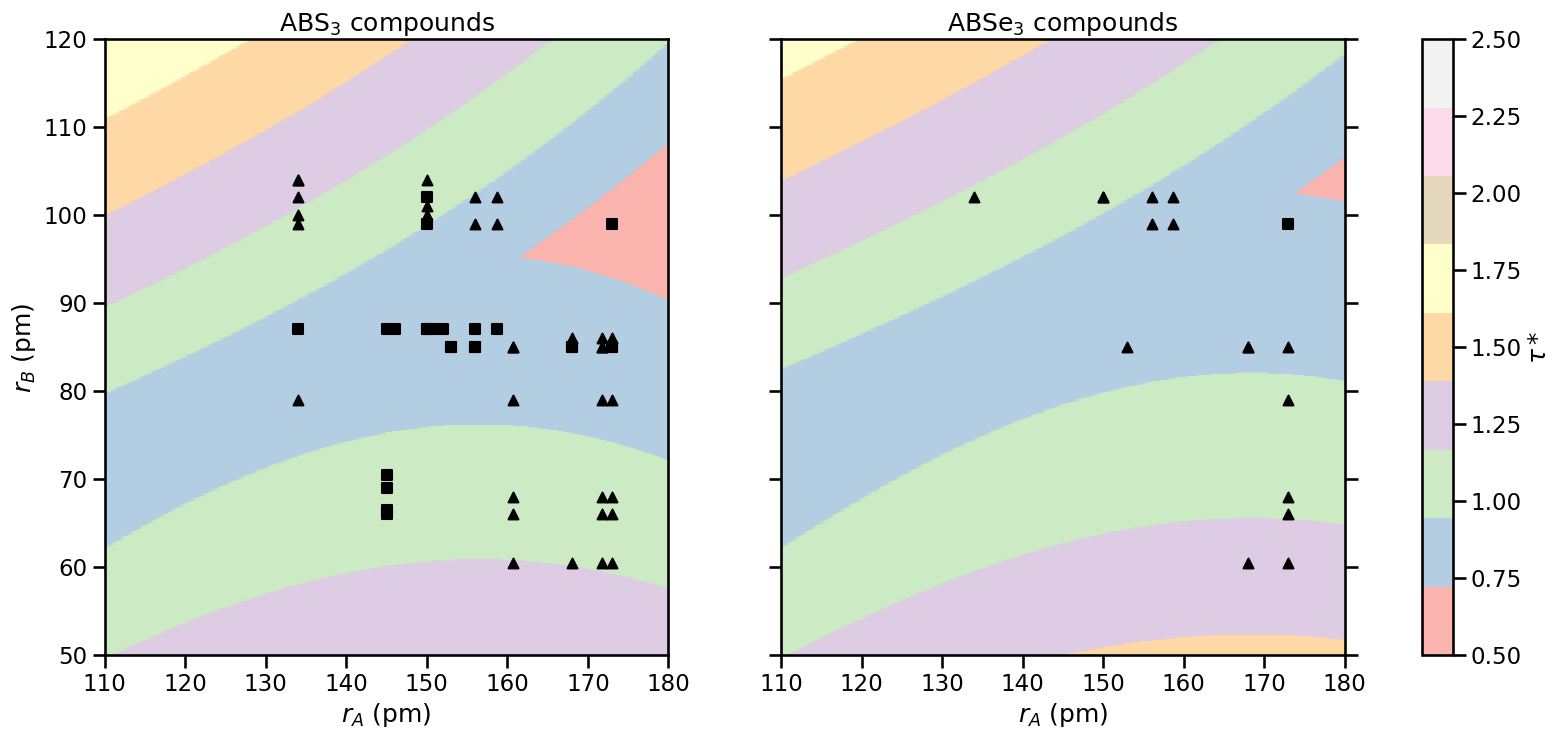

In [7]:
colormap_radii(df=df, exp_df=df_exp, t_sisso=True)

## Bandgap estimation

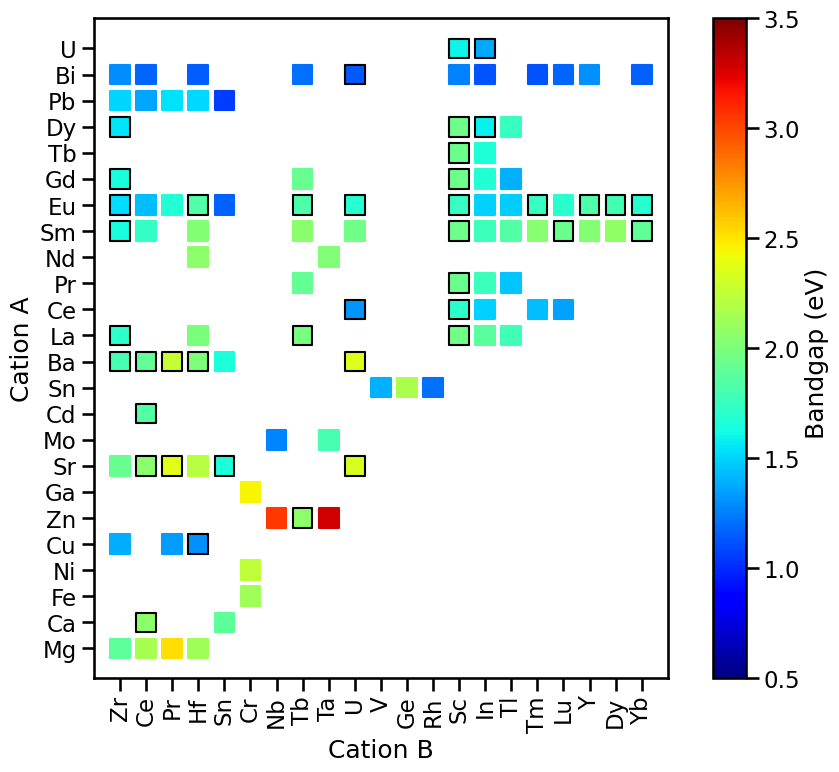

In [8]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.plots import plot_matrix
import pandas as pd

df_crystal = pd.read_csv(PROCESSED_DATA_DIR / "results_CrystaLLM_with_bandgap.csv")

df_sisso = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_bandgap.csv")

#remove from the sisso data frame the entries that are not in the crystal dataframe
#df_sisso = df_sisso[df_sisso['formula'].isin(df_crystal['formula'])]

df_sisso.rename(columns={'bandgap':'Eg'}, inplace=True)
df_crystal.rename(columns={'bandgap':'Eg'}, inplace=True)

plot_matrix(df_sisso, df_crystal, anion='S')

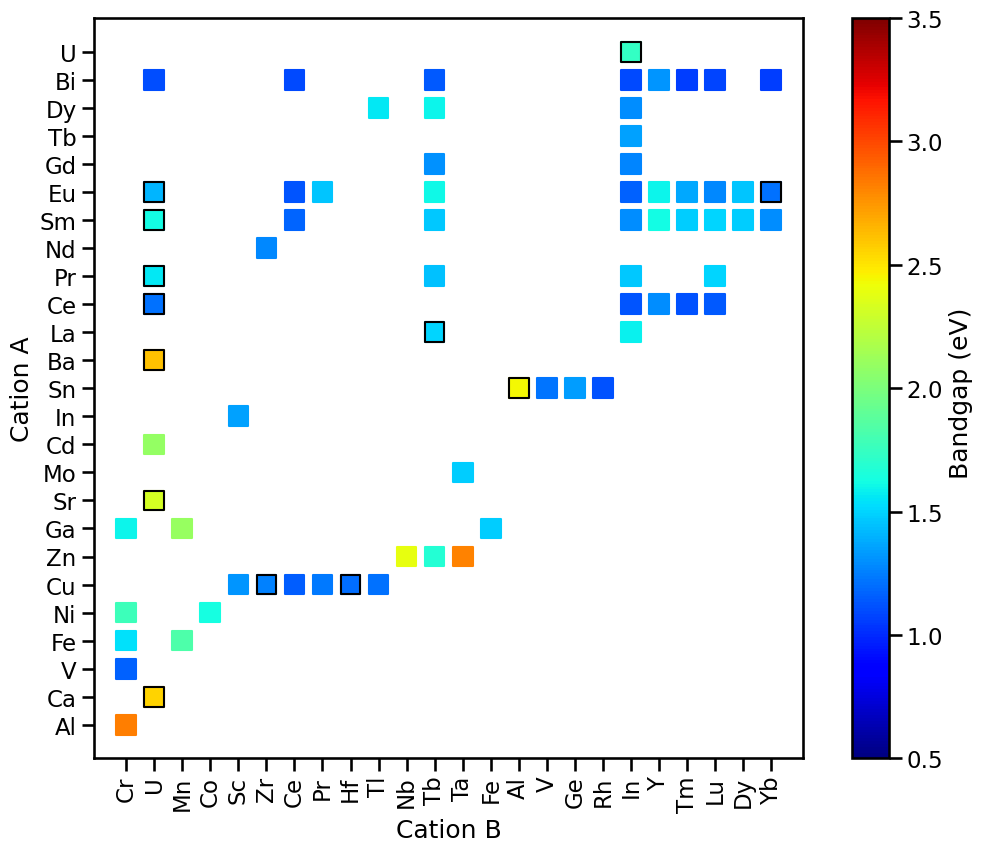

In [9]:
plot_matrix(df_sisso, df_crystal, anion='Se')

2025-12-24 10:10:22.575 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-12-24 10:10:22.600 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.


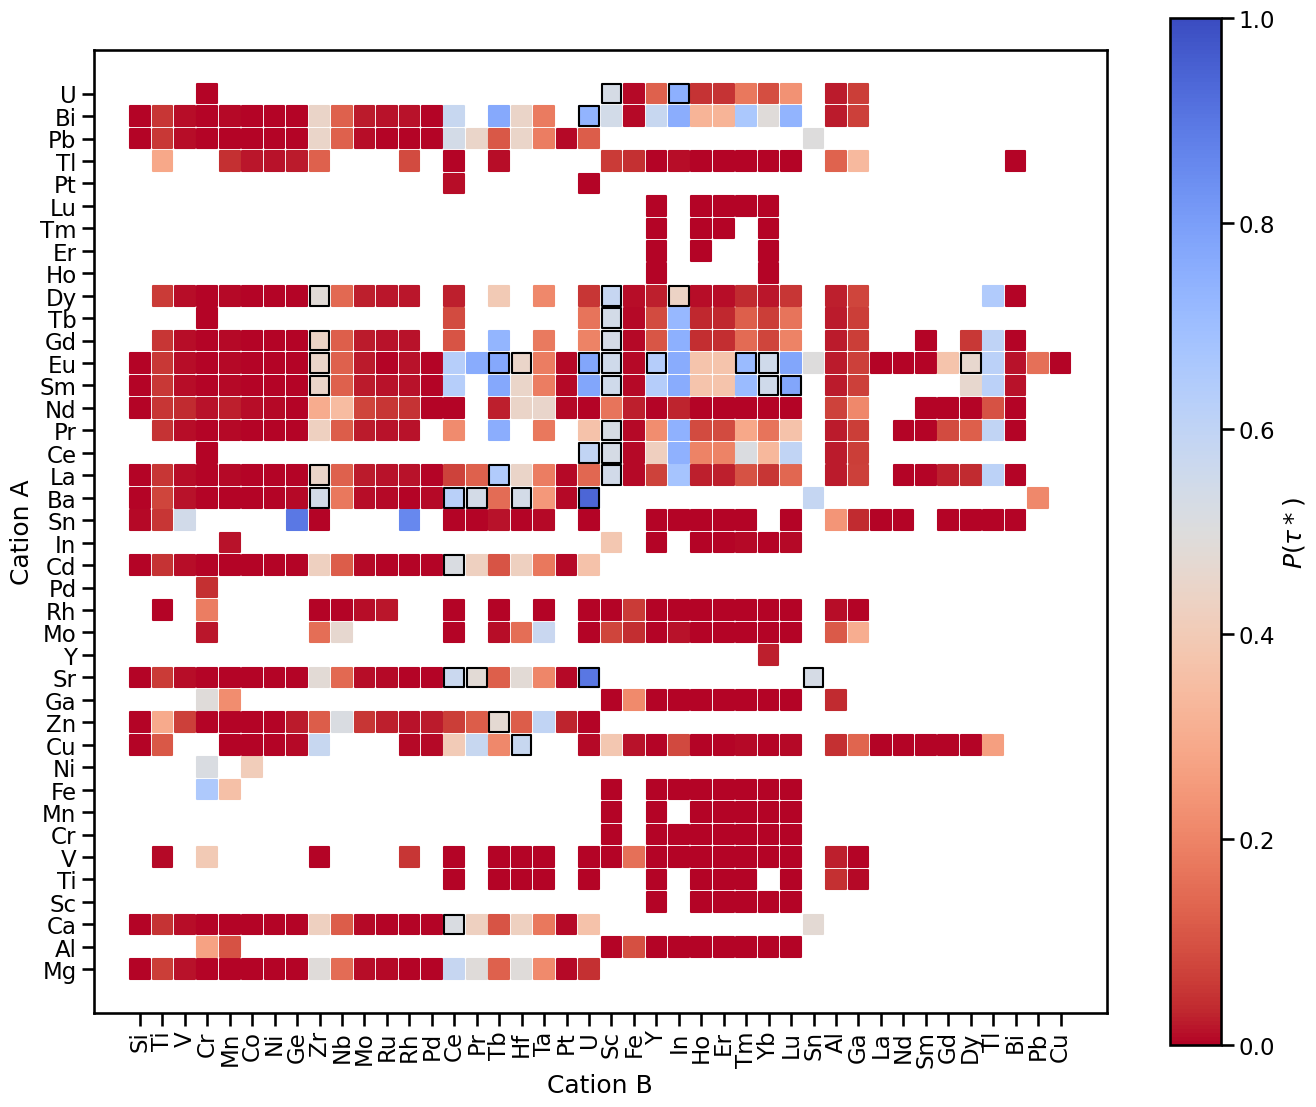

In [10]:
df_possible = pd.read_csv(PROCESSED_DATA_DIR / "valid_new_compositions.csv")
df_possible.rename(columns={'Unnamed: 0':'formula'}, inplace=True)

plot_matrix(df_possible, df_crystal, anion='S', parameter='p_t_sisso')

2025-12-24 10:10:24.962 | INFO     | tf_chpvk_pv.modeling.train:train_platt_scaling:49 - Training Platt scaling model...
2025-12-24 10:10:24.989 | SUCCESS  | tf_chpvk_pv.modeling.train:train_platt_scaling:65 - Platt scaling model training complete.


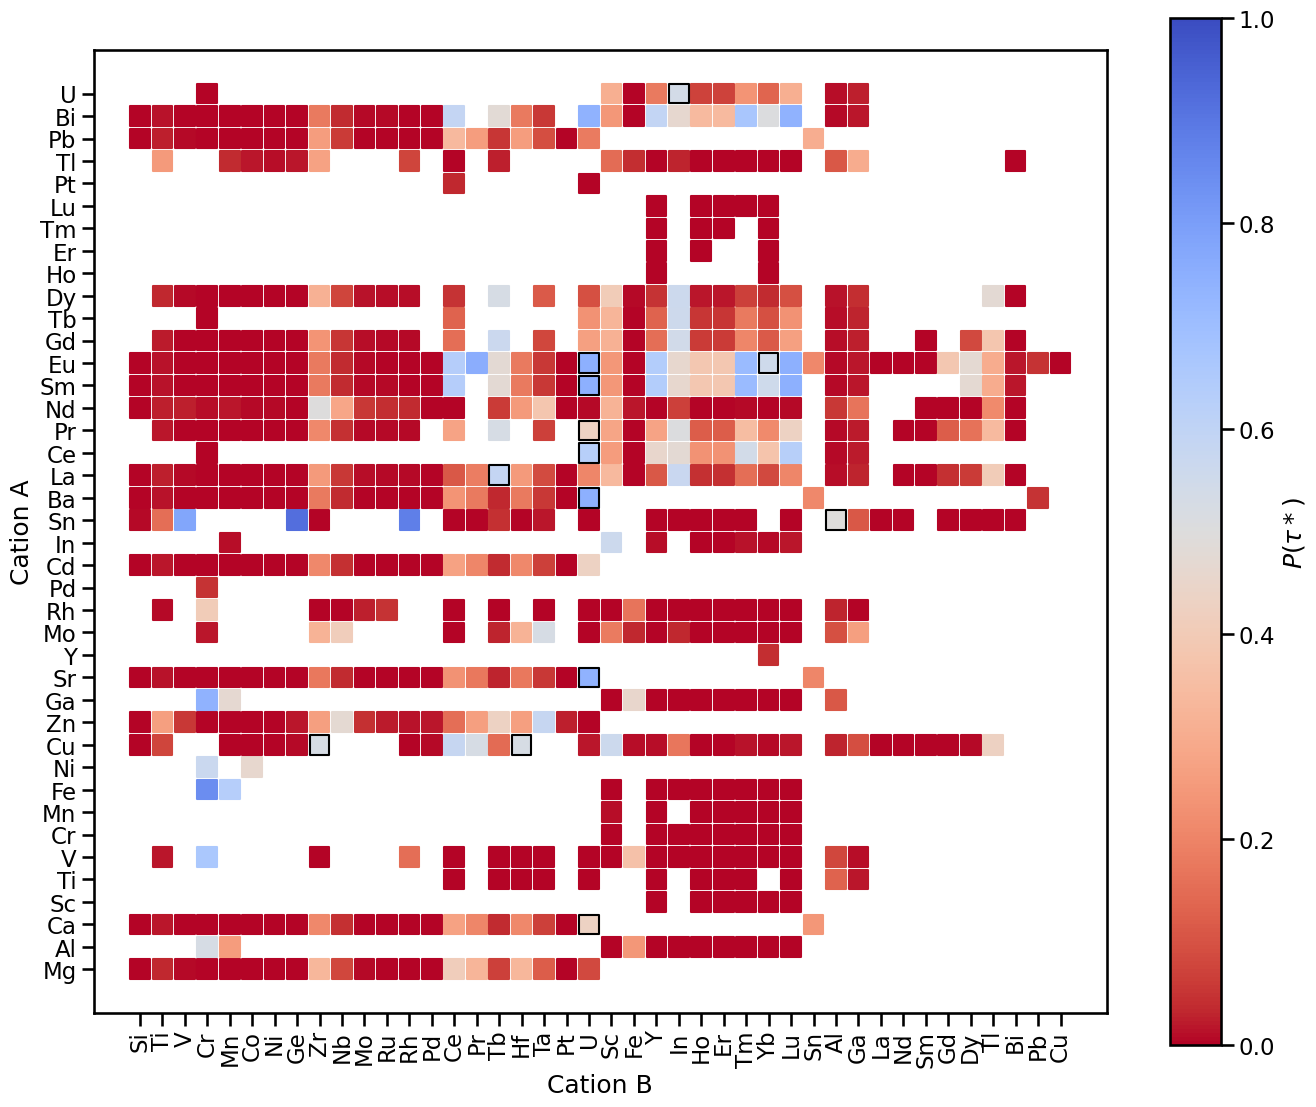

In [11]:
plot_matrix(df_possible, df_crystal, anion='Se', parameter='p_t_sisso')

2026-01-03 18:48:06.798 | INFO     | tf_chpvk_pv.config:<module>:11 - PROJ_ROOT path is: /home/dagar/TF-ChPVK-PV


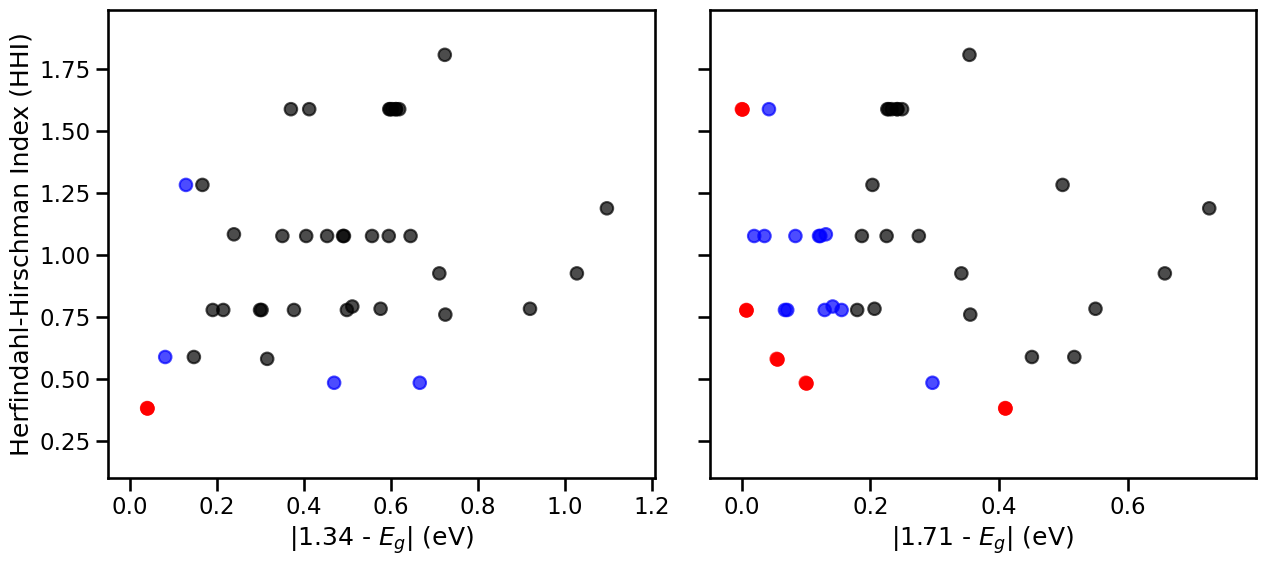

In [1]:
from tf_chpvk_pv.plots import pareto_front_plot, normalize_abx3
from tf_chpvk_pv.config import PROCESSED_DATA_DIR, FIGURES_DIR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_sisso = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_bandgap.csv")
df_crystal = pd.read_csv(PROCESSED_DATA_DIR / "results_CrystaLLM_with_bandgap.csv")
df_hhi = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_HHI.csv")
df_hhi.rename(columns={'material':'formula'}, inplace=True)

df_sisso["norm_formula"] = df_sisso["formula"].apply(normalize_abx3)
df_crystal["norm_formula"] = df_crystal["formula"].apply(normalize_abx3)

df_crystal_sisso = df_sisso[df_sisso['norm_formula'].isin(df_crystal['norm_formula'])]

df_crystal_sisso_hhi = df_crystal_sisso[['formula', 'A', 'B', 'X', 'bandgap', 'bandgap_sigma', 't_sisso']]

df_crystal_sisso_hhi = df_crystal_sisso_hhi.merge(df_hhi[['formula', 'HHI', 'SR']], on='formula', how='left')

sns.set_context('talk')
fig, ax = plt.subplots(1, 2, figsize=(13, 6), tight_layout=True)

pareto_front_plot(df_crystal_sisso_hhi, "HHI", Eg_ref=1.34, ax=ax[0])
pareto_front_plot(df_crystal_sisso_hhi, "HHI", Eg_ref=1.71, ax=ax[1], same_y_axis=True)

fig.savefig(FIGURES_DIR / "pareto_front_HHI_Eg.png", dpi=300)

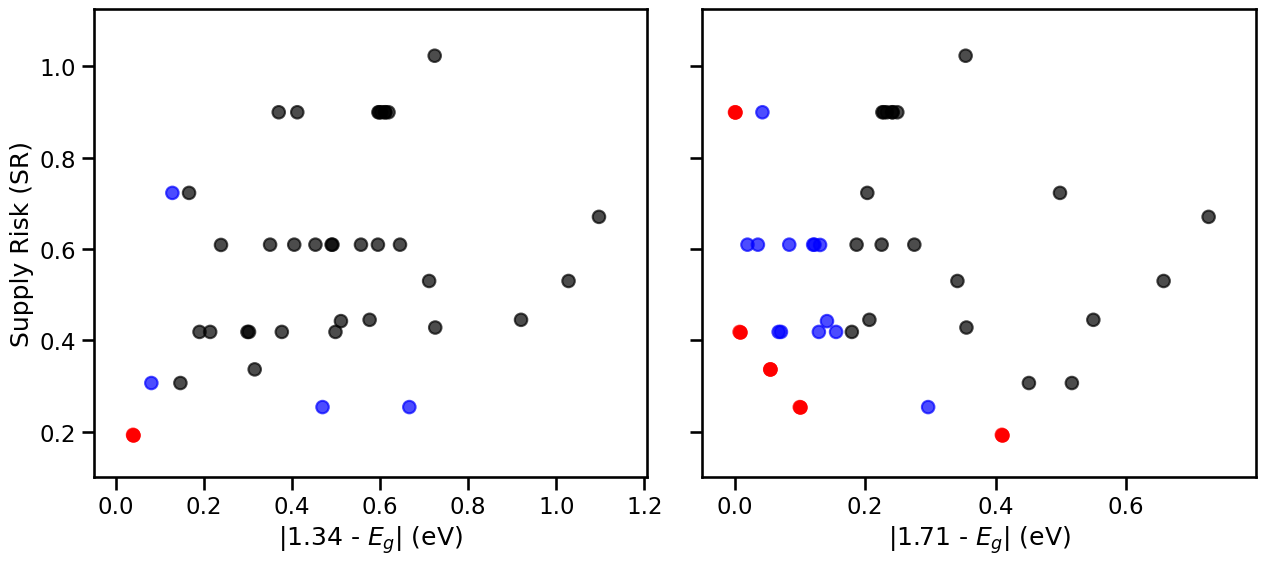

In [2]:
sns.set_context('talk')
fig, ax = plt.subplots(1, 2, figsize=(13, 6), tight_layout=True)

pareto_front_plot(df_crystal_sisso_hhi, "SR", Eg_ref=1.34, ax=ax[0])
pareto_front_plot(df_crystal_sisso_hhi, "SR", Eg_ref=1.71, ax=ax[1], same_y_axis=True)

fig.savefig(FIGURES_DIR / "pareto_front_SR_Eg.png", dpi=300)

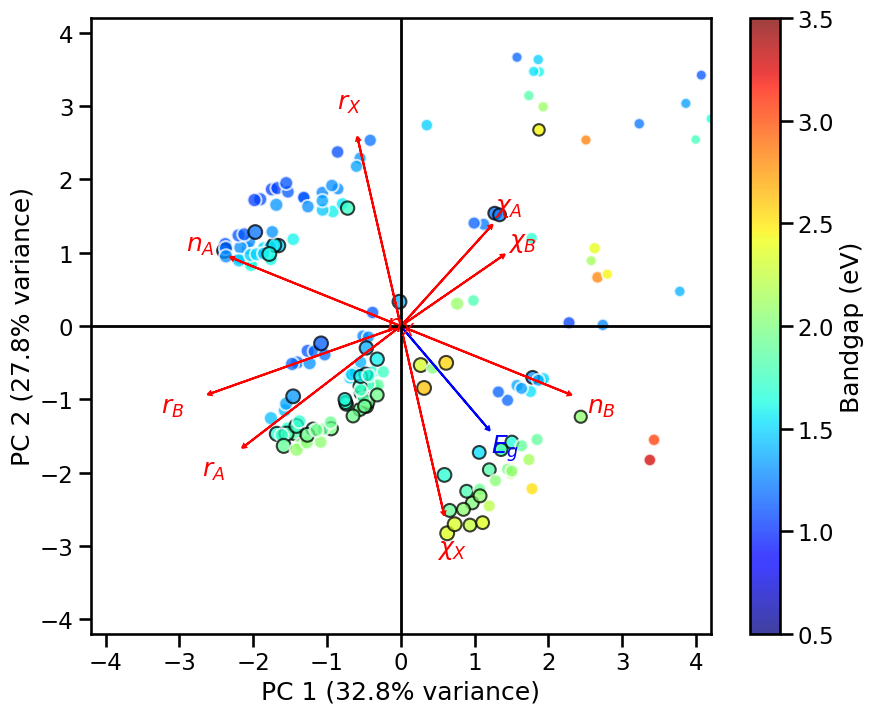

In [3]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR
from tf_chpvk_pv.features import perform_pca
from tf_chpvk_pv.plots import plot_PCA, normalize_abx3
import pandas as pd

df_sisso = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_bandgap.csv")
df_crystal = pd.read_csv(PROCESSED_DATA_DIR / "results_CrystaLLM_with_bandgap.csv")

df_sisso["norm_formula"] = df_sisso["formula"].apply(normalize_abx3)
df_crystal["norm_formula"] = df_crystal["formula"].apply(normalize_abx3)

df_crystal_sisso = df_sisso[df_sisso['norm_formula'].isin(df_crystal['norm_formula'])]

df_sisso['color_edge'] = 'w'
df_sisso.loc[df_sisso['formula'].isin(df_crystal_sisso['formula']), 'color_edge'] = 'k'

varibles = ['A', 'B', 'X', 'nA', 'nB', 'nX', 'chi_A', 'chi_B', 'chi_X',
       'rX', 'rA', 'rB']

target = ['bandgap']

df_scaled, df_pca, component_loadings, explained_variance_ratio, pca = perform_pca(df_sisso, varibles, target)
plot_PCA(df_scaled, df_pca, df_sisso, component_loadings, pca)

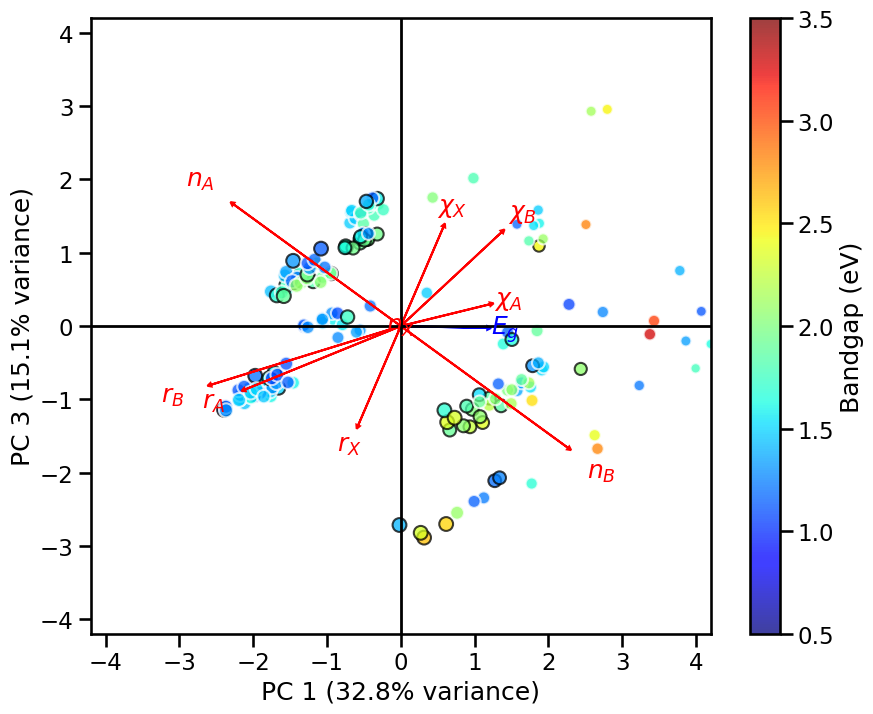

In [4]:
plot_PCA(df_scaled, df_pca, df_sisso, component_loadings, pca, pc1=1, pc2=3)

In [5]:
df_crystal_sisso_all = df_crystal_sisso.merge(df_hhi[['formula', 'HHI', 'SR']], on='formula', how='left')
df_crystal_sisso_all.to_csv(PROCESSED_DATA_DIR / "crystal_sisso_hhi_sr.csv", index=False)

## Trials for estimating probability of synthesis following [Dessi et al](https://iopscience.iop.org/article/10.1088/2632-2153/ae2381/pdf)

In [3]:
from tf_chpvk_pv.config import PROCESSED_DATA_DIR

import pandas as pd

df = pd.read_csv(PROCESSED_DATA_DIR / "chpvk_dataset.csv")

df_crystal = pd.read_csv(PROCESSED_DATA_DIR / "results_CrystaLLM_with_bandgap.csv")

In [21]:
a = df_crystal[~df_crystal['formula'].isin(df['material'])].formula.to_list()
len(a)

40

In [22]:
b = df[df['material'].isin(df_crystal['formula'])].material.values.tolist()
len(b)

14

In [51]:
pred_df = pd.DataFrame(columns=['Sr', 'Ba', 'Ti', 'Hf', 'Zr', 'Ge', 'Sn',
       'Pb', 'S', 'Se', 'Te', 'K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Cl', 'Br',
       'I', 'Tl', 'Au', 'As', 'Cu', 'Y', 'Sc', 'Ag', 'Al', 'Ga', 'Bi', 'La',
       'In', 'Sb', 'F', 'Pt', 'Pd', 'Crystal Structure'])

In [4]:
from tf_chpvk_pv.plots import normalize_abx3

df_sisso = pd.read_csv(PROCESSED_DATA_DIR / "results_SISSO_with_bandgap.csv")

df_sisso["norm_formula"] = df_sisso["formula"].apply(normalize_abx3)
df_crystal["norm_formula"] = df_crystal["formula"].apply(normalize_abx3)

df_crystal_sisso = df_sisso[df_sisso['norm_formula'].isin(df_crystal['norm_formula'])]

In [57]:
phase = 'Ortho'
decomp_en = None
band_gap =  None

element_not_present = []

for idx in df_crystal_sisso.index:
    dict_composition = {df_crystal_sisso.loc[idx, 'A']:1,
                        df_crystal_sisso.loc[idx, 'B']:1,
                        df_crystal_sisso.loc[idx, 'X']:3, 
                        }
    
    # Create a new row as a dictionary, initializing all element counts to 0
    new_row = {col: 0 for col in pred_df.columns}

    add_compound = True

    # Update the new row with the values from your composition dictionary
    for element, value in dict_composition.items():
        if element in new_row:
            new_row[element] = value
        else:
            #print(f"Warning: Element {element} not found in DataFrame columns.")
            add_compound = False
            if element not in element_not_present:
                element_not_present.append(element)

    # Add the other information to the new row
    new_row['Crystal Structure'] = phase
    new_row['Decomposition Energy'] = decomp_en
    new_row['Band Gap'] = band_gap

    # Convert the new row dictionary to a DataFrame and append it
    new_row_df = pd.DataFrame([new_row])
    if add_compound:
        print(f"Adding compound with composition: {dict_composition}")
        pred_df = pd.concat([pred_df, new_row_df], ignore_index=True)
    #else:
        #print(f"Skipping compound with composition: {dict_composition}")

Adding compound with composition: {'Ba': 1, 'Hf': 1, 'S': 3}
Adding compound with composition: {'Ba': 1, 'Zr': 1, 'S': 3}
Adding compound with composition: {'Sr': 1, 'Sn': 1, 'S': 3}
Adding compound with composition: {'Sn': 1, 'Al': 1, 'Se': 3}
Adding compound with composition: {'Cu': 1, 'Hf': 1, 'S': 3}
Adding compound with composition: {'Cu': 1, 'Hf': 1, 'Se': 3}
Adding compound with composition: {'Cu': 1, 'Zr': 1, 'Se': 3}
Adding compound with composition: {'La': 1, 'Sc': 1, 'S': 3}
Adding compound with composition: {'La': 1, 'Zr': 1, 'S': 3}


In [55]:
pred_df.to_csv(PROCESSED_DATA_DIR / "PU_predicted_structures.csv")